# Tracer simulation results

* A notebook shows my NEMO run, frequently changing.

#Content
1. [**Boundary + Initial + Source**](#Boundary-+-Initial-+-Source)

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

#Boundary + Initial + Source

```fortran
     IF( kt < 10 ) THEN
         WRITE(*, *) '~~~~~ Initialization ~~~~~'
         CALL fld_read (kt, 1, sf_ini)
         Ba_ini(:, :, :) = sf_ini(1)%fnow(:, :, :)
         trn(:, :, :, jpmyt1) = Ba_ini(:, :, :)
      ENDIF

      ! Read Barium source, boundary
      CALL fld_read (kt, 1, sf_river)
      CALL fld_read (kt, 1, sf_boundary)
      Ba(:, :)          = sf_river(1)%fnow(:, :, 1)
      Ba_boundary(:, :) = sf_boundary(1)%fnow(:, :, 1)

      ! Assign boundary conditions
      DO i = 1, jpi
         DO j = 1, jpj
            IF (Ba_boundary(i, j)>0) THEN
               IF (un(i, j, 1)>0) THEN
                  trn(i, j, 1, jpmyt1) = Ba_boundary(i, j)
               ENDIF
            ENDIF
         ENDDO
      ENDDO

      ! Add source through "tra"
      tra(:, :, 1, jpmyt1) = (Ba(:, :)-trb(:, :, 1, jpmyt1))*rnf(:, :)/e3t(:, :, 1)/1000.0
```

In [4]:
filename=glob.glob('_data/IC_BC*.nc')
print(filename)

['_data\\IC_BC_3yrs_1m_00010101_00031231_grid_T.nc', '_data\\IC_BC_3yrs_1m_00010101_00031231_grid_U.nc', '_data\\IC_BC_3yrs_1m_00010101_00031231_grid_V.nc', '_data\\IC_BC_3yrs_1m_00010101_00031231_ptrc_T.nc']


In [5]:
ptrc_obj = nc.Dataset(filename[-1])
Ba=ptrc_obj.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [6]:
Ba[Ba==0]=np.nan
nav_lon = nav_lon[120:, :]
nav_lat = nav_lat[120:, :]
Ba_surf = Ba[-1, 0, 120:, :]

In [10]:
np.nanmax(Ba_surf)

41.617458

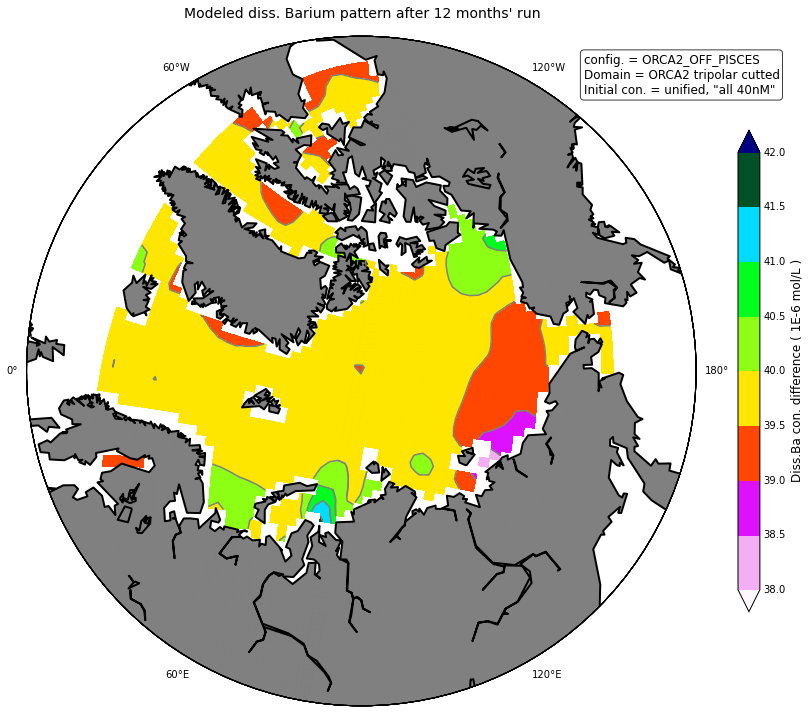

In [39]:
lev = [38, 38.5, 39, 39.5, 40, 40.5, 41, 41.5, 42]

fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
#
proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
x, y=proj(nav_lon, nav_lat)
# Ba
CS=proj.contourf(x, y, Ba_surf, lev, cmap=plt.cm.gist_ncar_r, extend='both')
proj.contour(x, y, Ba_surf, lev, linewidths=1.5, colors=('gray',))
# Frame
proj.plot(x.T, y.T, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
proj.plot(x, y, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
# Legend
CBar = plt.colorbar(CS, shrink=0.575)
CBar.set_label('Diss.Ba con. difference ( 1E-6 mol/L )', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
plt.text(0.95*x.max(), 0.95*y.max(), 'config. = ORCA2_OFF_PISCES\nDomain = ORCA2 tripolar cutted\nInitial con. = unified, "all 40nM"', \
         bbox=dict(facecolor='w', edgecolor='k', boxstyle='round', alpha=0.75), fontsize=12) 
ax.set_title("Modeled diss. Barium pattern after 12 months' run", fontsize=14, y=1.02)

fig.savefig('Ba_simulation_result.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
            transparent=False, bbox_inches='tight', pad_inches=0)

## Boundary + Source +Intial Test 2

```fortran
tra(:, :, 1, jpmyt1) = (Ba(:, :))*rnf(:, :)/e3t(:, :, 1)/1000.0
```

In [20]:
filename=glob.glob('_data/EXP01*.nc')
print(filename)

['_data\\EXP01_1m_00010101_00031231_grid_T.nc', '_data\\EXP01_1m_00010101_00031231_grid_U.nc', '_data\\EXP01_1m_00010101_00031231_grid_V.nc', '_data\\EXP01_1m_00010101_00031231_ptrc_T.nc']


In [21]:
ptrc_obj = nc.Dataset(filename[-1])
Ba=ptrc_obj.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [22]:
Ba[Ba==0]=np.nan
nav_lon = nav_lon[120:, :]
nav_lat = nav_lat[120:, :]
diff_Ba = Ba[11, 0, :, :]-50.0
diff_Ba = diff_Ba[120:, :]
#hit = Nts.find_inland(nav_lon, nav_lat)
diff_Ba_masked = np.ma.masked_where(np.isnan(diff_Ba), diff_Ba)

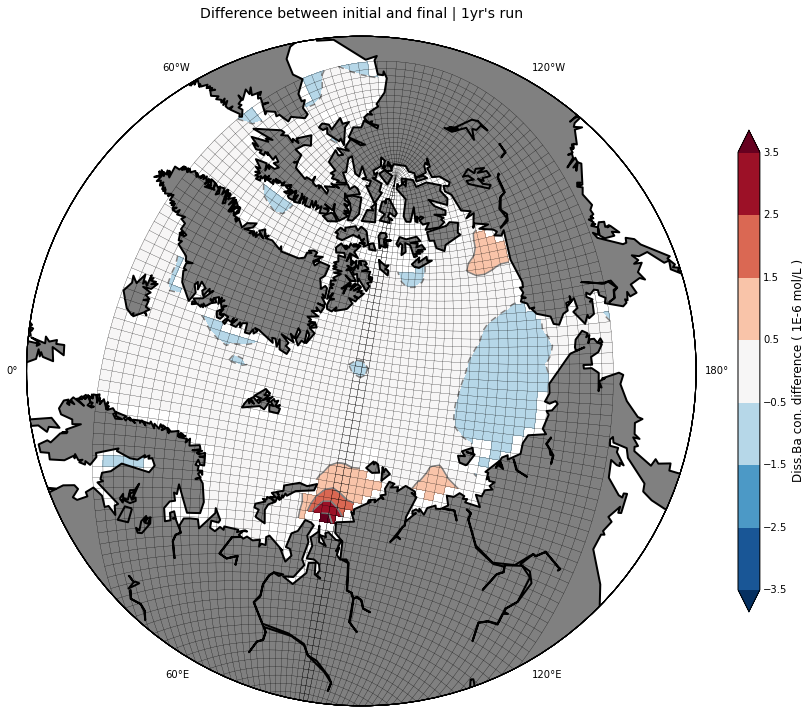

In [23]:
lev = [-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]

fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
#
proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
x, y=proj(nav_lon, nav_lat)
# Ba
CS=proj.contourf(x, y, diff_Ba_masked, lev, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, diff_Ba_masked, lev, linewidths=1.5, colors=('gray',))
# Frame
proj.plot(x, y, 'k-', linewidth=0.25); proj.plot(x.T, y.T, 'k-', linewidth=0.25)
# Legend
CBar = plt.colorbar(CS, shrink=0.575)
CBar.set_label('Diss.Ba con. difference ( 1E-6 mol/L )', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)
ax.set_title("Difference between initial and final | 1yr's run", fontsize=14, y=1.02)